# Model Training and Evaluation

We look at a number of different models to determine which model performs the best on the given data set.

# Load Data and Import libs

In [1]:
import os

project_root = os.path.join(os.getcwd(), os.pardir)
processed_data_dir = os.path.join(project_root, 'data', 'processed')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train_df = pd.read_csv(os.path.join(processed_data_dir, 'train.csv'))
train_df['Age'] = pd.to_numeric(train_df['Age'])
# Kaggle does not provide survived column in test data...
# test_df = pd.read_csv(os.path.join(processed_data_dir, 'test.csv'))

In [4]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,Master,Miss,Mr,Mrs,Other,Rev
0,0,22.0,1,0,7.2500,1,0,1,0,1,0,0,1,0,0,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,0,1,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,0,0,1,0,0,0


In [5]:
train_df.describe()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,Master,Miss,Mr,Mrs,Other,Rev
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.258328,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783,0.206510,0.551066,0.044893,0.204265,0.580247,0.140292,0.015713,0.006734
std,0.486592,13.546307,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876,0.405028,0.497665,0.207186,0.403390,0.493796,0.347485,0.124431,0.081830
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,36.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


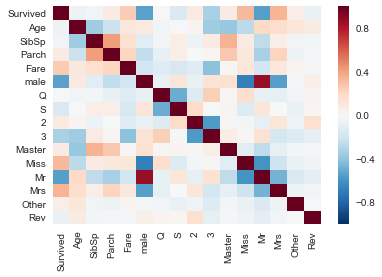

In [6]:
sns.heatmap(train_df.corr())

# Train and Evaluate Models

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [8]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('SVC', SVC()),
    ('NuSVC', NuSVC()),
    ('Linear SVC', LinearSVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('NB', GaussianNB())
]

In [9]:
train_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', '2', '3',
       'Master', 'Miss', 'Mr', 'Mrs', 'Other', 'Rev'],
      dtype='object')

In [10]:
from sklearn.model_selection import train_test_split

X = train_df.drop('Survived',axis=1)
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X,        
    y, 
    test_size=0.30, 
    random_state=101
)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import KFold, cross_val_score

reports = []
kfold_results = []
names = []

for name, model in models:
    names.append(name)
    
    # kfold
    kfold = KFold(n_splits=10, random_state=7)
    kfold_result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    kfold_results.append(kfold_result)
    
    # train test split
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    reports.append({
        'name': name,
        'confusion': confusion_matrix(y_test, predictions),
        'accuracy': accuracy_score(y_test, predictions),
        'f1': f1_score(y_test, predictions)
    })

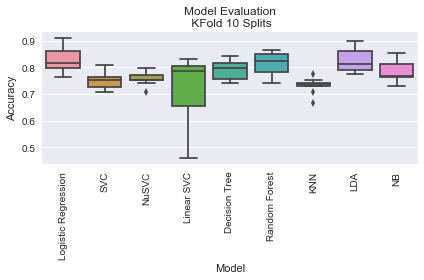

In [12]:
g = sns.boxplot(x=names, y=kfold_results, )
g.set_title('Model Evaluation\n KFold 10 Splits')
g.set_xlabel('Model')
g.set_ylabel('Accuracy')
g.set_xticklabels(names, rotation=90)
g.get_figure().tight_layout()

In [13]:
def print_model_stats(kfold_result, report):
    tn = report['confusion'][0][0] # True negative
    fp = report['confusion'][0][1] # False positive
    fn = report['confusion'][1][0] # False negative
    tp = report['confusion'][1][1] # True positive
    
    mr = 1 - report['accuracy'] # Misclassification rate
    tpr = tp / (fn + tp) # True positive rate
    fpr = fp / (tn + fp) # False positive rate
    spec = 1 - fpr # Specificity
    prec = tp / (fp + tp) # Precision    
    
    print('--------------------')
    print(report['name'])
    print('--------------------')
    print('F1 Score:        ', report['f1'])
    print('Accuracy:        ', report['accuracy'])
    print('Mean KFold (10): ', kfold_result.mean())
    print('Std. KFold (10): ', kfold_result.std())
    print('TPR:             ', tpr)
    print('FPR:             ', fpr)
    print('Specificity:     ', spec)
    print('Precision:       ', prec)
    print()
    
for kfold, report in zip(kfold_results, reports):
    print_model_stats(kfold_result, report)

--------------------
Logistic Regression
--------------------
F1 Score:         0.767772511848
Accuracy:         0.817164179104
Mean KFold (10):  0.781198501873
Std. KFold (10):  0.0376302182976
TPR:              0.710526315789
FPR:              0.103896103896
Specificity:      0.896103896104
Precision:        0.835051546392

--------------------
SVC
--------------------
F1 Score:         0.633663366337
Accuracy:         0.723880597015
Mean KFold (10):  0.781198501873
Std. KFold (10):  0.0376302182976
TPR:              0.561403508772
FPR:              0.155844155844
Specificity:      0.844155844156
Precision:        0.727272727273

--------------------
NuSVC
--------------------
F1 Score:         0.657004830918
Accuracy:         0.735074626866
Mean KFold (10):  0.781198501873
Std. KFold (10):  0.0376302182976
TPR:              0.59649122807
FPR:              0.162337662338
Specificity:      0.837662337662
Precision:        0.731182795699

--------------------
Linear SVC
---------------

# Create Ensemble Model - VotingClassifier

In [14]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(
    estimators=[
        ('Logistic Regression', LogisticRegression()), 
        ('Decision Tree', DecisionTreeClassifier()), 
        ('Random Forest', RandomForestClassifier())
    ], 
    voting='hard'
)

names.append('Voting')

# kfold
kfold = KFold(n_splits=10, random_state=7)
kfold_result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
kfold_results.append(kfold_result)

# train test split
model.fit(X_train, y_train)
predictions = model.predict(X_test)
reports.append({
    'name': 'Voting',
    'confusion': confusion_matrix(y_test, predictions),
    'accuracy': accuracy_score(y_test, predictions),
    'f1': f1_score(y_test, predictions)
})

In [15]:
print_model_stats(kfold_results[-1], reports[-1])

--------------------
Voting
--------------------
F1 Score:         0.760975609756
Accuracy:         0.817164179104
Mean KFold (10):  0.826079900125
Std. KFold (10):  0.03238262546
TPR:              0.684210526316
FPR:              0.0844155844156
Specificity:      0.915584415584
Precision:        0.857142857143



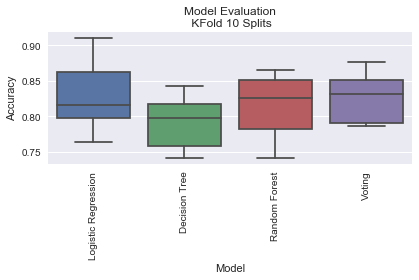

In [16]:
names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Voting']
kfold_results = [
    kfold_results[0], 
    kfold_results[4], 
    kfold_results[5], 
    kfold_results[-1]
]

g = sns.boxplot(x=names, y=kfold_results, )
g.set_title('Model Evaluation\n KFold 10 Splits')
g.set_xlabel('Model')
g.set_ylabel('Accuracy')
g.set_xticklabels(names, rotation=90)
g.get_figure().tight_layout()

# Save the Voting model

In [55]:
import pickle

model_root = os.path.join(project_root, 'models')

with open(os.path.join(model_root, 'voting.pickle'), 'wb') as f:
    pickle.dump(model, f)

# Would I die on the titanic?

We can infer some of these values based on my income etc...

In [42]:
# I'm 29 right now
age = 29

# I have a wife that would probably be on board
sibsp = 1

# No kids etc...would be on board
parch = 0

# Take the average of middle class fares
fare = train_df[train_df['2'] == 1]['Fare'].mean().round(2)

# I'm male...
male = 1

# This port is closest to me
q = 1
s = 0

# I'm middle class right now
second_class = 1
third_class = 0

# My title would be Mr
master = 0
miss = 0
mr = 1
mrs = 0
other = 0
rev = 0
X = [
    age,
    sibsp,
    parch,
    fare,
    male,
    q,
    s,
    second_class,
    third_class,
    master,
    miss,
    mr,
    mrs,
    other,
    rev
]

survived = model.predict([X])[0] == 1

if survived:
    print("You would have survived! :)")
else:
    print("You would have died. :(")

You would have died. :(


# Would my wife die on the titanic?

In [52]:
# She is 26 right now
age = 26

# I would be on board with my wife
sibsp = 1

# No kids etc...would be on board
parch = 0

# Take the average of middle class fares
fare = train_df[train_df['2'] == 1]['Fare'].mean().round(2)

# She is a female
male = 0

# This port is closest to me
q = 1
s = 0

# I'm middle class right now - so is my wife
second_class = 1
third_class = 0

# Her title would be Mrs
master = 0
miss = 0
mr = 0
mrs = 1
other = 0
rev = 0
X = [
    age,
    sibsp,
    parch,
    fare,
    male,
    q,
    s,
    second_class,
    third_class,
    master,
    miss,
    mr,
    mrs,
    other,
    rev
]

survived = model.predict([X])[0] == 1

if survived:
    print("You would have survived! :)")
else:
    print("You would have died. :(")

You would have survived! :)
